![NYC Skyline](img/nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many [Airbnb](https://www.airbnb.com/) listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this notebook, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:

- What is the average price, per night, of an Airbnb listing in NYC?
- How does the average price of an Airbnb listing, per month, compare to the private rental market?
- How many adverts are for private rooms?
- How do Airbnb listing prices compare across the five NYC boroughs?


In [1]:
# importing libraries and datasets
import numpy as np
import pandas as pd
prices = pd.read_csv("prices.csv")

In [2]:
room_types = pd.read_csv("room_types.csv")

In [3]:
reviews = pd.read_csv("reviews.csv")

In [6]:
# step 2
prices["price"] = pd.to_numeric(prices["price"])
prices["price"]

0        225
1         89
2        200
3         79
4        150
        ... 
25197    129
25198     45
25199    235
25200    100
25201     30
Name: price, Length: 25202, dtype: int64

In [7]:
#step 3
prices.describe()

,Unnamed: 0,listing_id,price,price_per_month,latitude,longitude
count,25202.000000,2.520200e+04,25202.000000,25202.000000,25202.000000,25202.000000
mean,12604.403579,2.068920e+07,141.817316,4313.610031,40.727145,-73.947975
std,7278.324661,1.103081e+07,147.350650,4481.915598,0.056304,0.050951
min,0.000000,2.595000e+03,10.000000,304.166667,40.506410,-74.244420
25%,6300.250000,1.202115e+07,69.000000,2098.750000,40.687400,-73.982608
50%,12607.500000,2.234547e+07,105.000000,3193.750000,40.721050,-73.953000
75%,18907.750000,3.037697e+07,175.000000,5322.916667,40.762577,-73.929733
max,25208.000000,3.645581e+07,7500.000000,228125.000000,40.913060,-73.712990


In [8]:
#step 3
free_listings = prices["price"] == 0
prices = prices.loc[~free_listings]
avg_price = round(prices['price'].mean(), 2)
avg_price


141.82

In [9]:
#step 4
prices["price_per_month"] = prices['price']*(365/12)
average_price_per_month = round(prices["price_per_month"].mean(), 2)
difference = round((average_price_per_month - 3100), 2)
difference

1213.61

In [10]:
# step 5
room_types['room_type'] = room_types['room_type'].str.lower()
room_types['room_type'] = room_types['room_type'].astype('category')
room_frequencies = room_types['room_type'].value_counts()
room_frequencies

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64

In [13]:
# step 6
reviews['last_review'] = pd.to_datetime(reviews['last_review'])
first_reviewed = reviews['last_review'].dt.date.min()
first_reviewed

datetime.date(2019, 1, 1)

In [14]:
last_reviewed = reviews['last_review'].dt.date.max()
last_reviewed

datetime.date(2019, 12, 6)

In [15]:
rooms_and_prices = prices.merge(room_types, how='outer', on='listing_id')
airbnb_merged = rooms_and_prices.merge(reviews, how='outer', on='listing_id')
airbnb_merged.dropna(inplace=True)
airbnb_merged.duplicated().sum()


0

In [16]:
# step 8


boroughs = airbnb_merged.groupby('borough')['price'].agg(['sum', 'mean', 'median', 'count'])
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
boroughs

,sum,mean,median,count
borough,,,,
Manhattan,1898417.0,184.04,149.0,10315
Brooklyn,1275250.0,122.02,95.0,10451
Queens,320715.0,92.83,70.0,3455
Staten Island,22974.0,86.04,71.0,267
Bronx,55156.0,79.25,65.0,696


In [17]:
#step 9
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, np.inf]

airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

prices_by_borough = airbnb_merged.groupby(['borough', 'price_range'])['price_range'].count()

prices_by_borough

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64

In [18]:
# step 10
airbnb_analysis = {'avg_price':avg_price, 'average_price_per_month':average_price_per_month, 'difference':difference, 'room_frequencies':room_frequencies, 'first_reviewed':first_reviewed, 'last_reviewed':last_reviewed, 'prices_by_borough':prices_by_borough}

print(airbnb_analysis)

{'avg_price': 141.82, 'average_price_per_month': 4313.61, 'difference': 1213.61, 'room_frequencies': entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64, 'first_reviewed': datetime.date(2019, 1, 1), 'last_reviewed': datetime.date(2019, 12, 6), 'prices_by_borough': borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive 

In [19]:
# a vizualiztion for the 10 most popular neighbourhoods, by room type and boroughs:

In [20]:
# first clear spaces from the neighbourhood column
airbnb_merged['neighbourhood'] = airbnb_merged['neighbourhood'].str.strip()

In [21]:
#finding the top 10 neighbourhoods
airbnb_merged.neighbourhood.value_counts().head(10)

Bedford-Stuyvesant    2206
Williamsburg          1846
Harlem                1432
Bushwick              1199
Hell's Kitchen        1116
East Village           866
Upper East Side        839
Upper West Side        775
Crown Heights          752
East Harlem            672
Name: neighbourhood, dtype: int64

In [22]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub=airbnb_merged.loc[airbnb_merged['neighbourhood'].isin(['Bedford-Stuyvesant','Williamsburg','Harlem','Bushwick',
                 'Hell\'s Kitchen','East Village','Upper East Side','Upper West Side','Crown Heights','East Harlem'])]

In [23]:
# install and import the needed modules for the viz
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

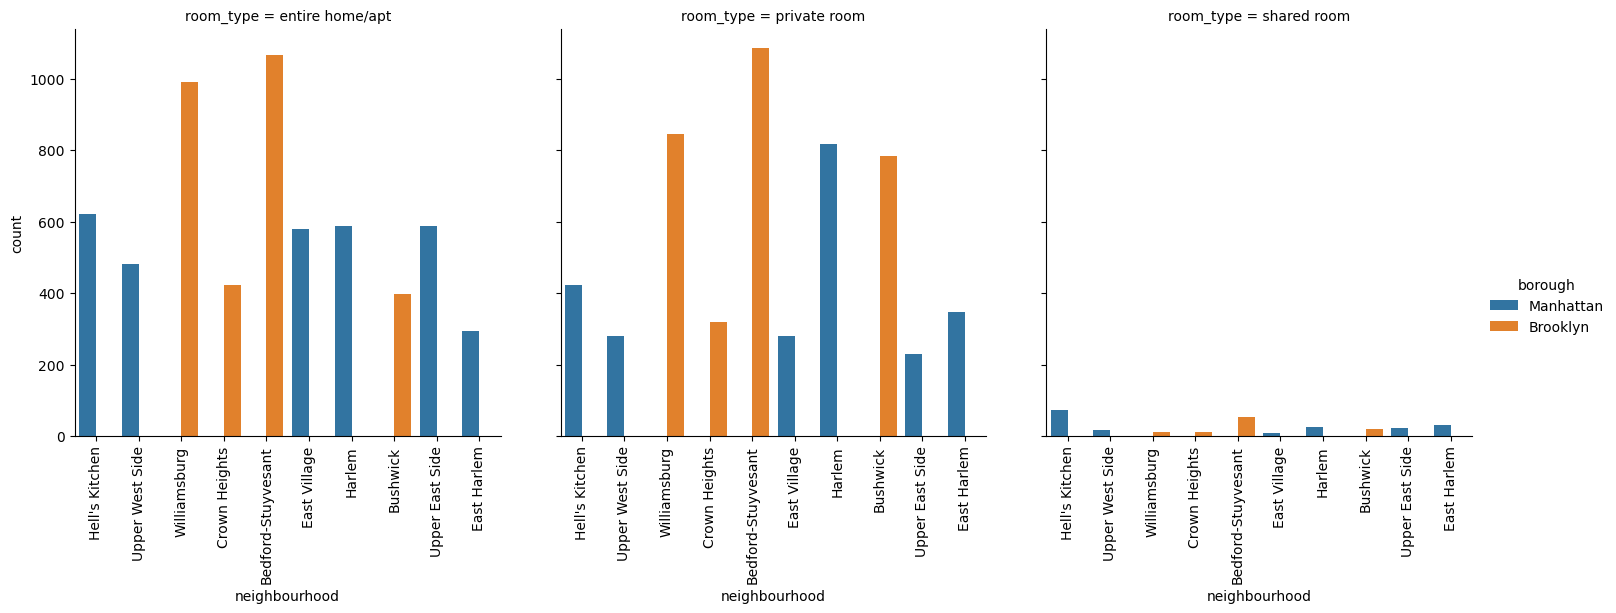

In [24]:
#using catplot to represent multiple interesting attributes together and a count
viz=sns.catplot(x='neighbourhood', hue='borough', col='room_type', data=sub, kind='count')
viz.set_xticklabels(rotation=90)

In [25]:
# find the count and average price by borough and room type
avg_price_spread = airbnb_merged.groupby(['borough','neighbourhood','room_type'])['price'].agg(['count', 'mean'])
avg_price_spread = avg_price_spread.round(2).sort_values("mean", ascending=False)
avg_price_spread

count    mean
borough       neighbourhood     room_type                     
Brooklyn      Sea Gate          entire home/apt      2  805.00
Manhattan     Tribeca           entire home/apt     50  450.66
Queens        Bayside           entire home/apt     11  398.91
Manhattan     Flatiron District entire home/apt     30  386.83
              SoHo              entire home/apt    127  383.83
...                                                ...     ...
Staten Island Woodlawn          private room         0     NaN
                                shared room          0     NaN
              Woodside          entire home/apt      0     NaN
                                private room         0     NaN
                                shared room          0     NaN

[3240 rows x 2 columns]

In [26]:
# the most commonly rented property types on Airbnb, considering the different neighborhoods
property_neighborhoods_popularity = airbnb_merged.groupby(['neighbourhood', 'room_type'])['price'].count().sort_values(ascending=False).head(20)
property_neighborhoods_popularity 


neighbourhood       room_type      
Bedford-Stuyvesant  private room       1086
                    entire home/apt    1066
Williamsburg        entire home/apt     990
                    private room        844
Harlem              private room        818
Bushwick            private room        783
Hell's Kitchen      entire home/apt     621
Harlem              entire home/apt     589
Upper East Side     entire home/apt     588
East Village        entire home/apt     579
Upper West Side     entire home/apt     480
Midtown             entire home/apt     443
Hell's Kitchen      private room        423
Crown Heights       entire home/apt     422
Bushwick            entire home/apt     397
Chelsea             entire home/apt     354
East Harlem         private room        347
Crown Heights       private room        320
Financial District  entire home/apt     301
West Village        entire home/apt     299
Name: price, dtype: int64